In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# READ DATA

In [ ]:
anti = pd.read_csv('Antihero Comments.csv')
anti.head()

,comment,author_name,like_count,date,just_date
0,I love you Taylor,ROTCIVVideos,0,2023-01-09 16:35:12+00:00,2023-01-09
1,What happened to having a few cans or a cider ...,Paul McA,0,2023-01-09 16:34:23+00:00,2023-01-09
2,AMAZING SONG TAY 💗,Reggie,0,2023-01-09 16:32:48+00:00,2023-01-09
3,4:13,丸いも,0,2023-01-09 16:29:09+00:00,2023-01-09
4,Our queen,Maluma kinge ♦,0,2023-01-09 16:20:16+00:00,2023-01-09


# EXPLORE THE DATA

In [ ]:
print('No of attributes: ', len(anti.columns))
print('No of rows: ', len(anti))

No of attributes:  5
No of rows:  68370


In [ ]:
anti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68370 entries, 0 to 68369
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comment      68340 non-null  object
 1   author_name  68366 non-null  object
 2   like_count   68370 non-null  int64 
 3   date         68370 non-null  object
 4   just_date    68370 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.6+ MB


# DROP UNNECESSARY COLUMN

In [ ]:
anti1=anti.drop(['just_date'],axis=1)
anti1.head()

,comment,author_name,like_count,date
0,I love you Taylor,ROTCIVVideos,0,2023-01-09 16:35:12+00:00
1,What happened to having a few cans or a cider ...,Paul McA,0,2023-01-09 16:34:23+00:00
2,AMAZING SONG TAY 💗,Reggie,0,2023-01-09 16:32:48+00:00
3,4:13,丸いも,0,2023-01-09 16:29:09+00:00
4,Our queen,Maluma kinge ♦,0,2023-01-09 16:20:16+00:00


Column ['just_date'] is dropped as it is not relevant to the sentiment analysis

# CHECKING DATA

In [ ]:
#checking null
anti1.isnull().sum()

comment        30
author_name     4
like_count      0
date            0
dtype: int64

There exists null value in the 'comment' and is removed to improve the model performance.

In [ ]:
anti2 = anti1.dropna()

In [ ]:
#recheck null
anti2.isnull().sum()

comment        0
author_name    0
like_count     0
date           0
dtype: int64

In [ ]:
#checking duplicate
anti2[anti2.duplicated(keep=False)]

,comment,author_name,like_count,date
7154,..,Jay Mark Oloverio,0,2022-11-11 13:20:57+00:00
7155,..,Jay Mark Oloverio,0,2022-11-11 13:20:57+00:00
9149,000,Hilt,0,2022-11-04 07:40:07+00:00
9150,000,Hilt,0,2022-11-04 07:40:07+00:00
19158,Vv,Sethina Lagon,0,2022-10-24 09:01:07+00:00
19159,Vv,Sethina Lagon,0,2022-10-24 09:01:07+00:00
19160,Vv,Sethina Lagon,0,2022-10-24 09:01:07+00:00
58197,LINDA,milly๑,0,2022-10-21 12:10:08+00:00
58198,LINDA,milly๑,0,2022-10-21 12:10:08+00:00


Duplicated rows are removed to maintain model's accuracy

In [ ]:
#remove theduplicateddataandkeepfirst
anti2.drop_duplicates(keep='first', inplace=True)

In [ ]:
#rechecking duplicate
anti2[anti2.duplicated(keep=False)]

,comment,author_name,like_count,date


In [ ]:
print('New no of attributes: ', len(anti2.columns))
print('New no of rows: ', len(anti2))

New no of attributes:  4
New no of rows:  68331


# DATA TRANSFORMATION

LOWER CASING

In [ ]:
anti2["comment_lower"] = anti2["comment"].str.lower()

REMOVAL PUNCTUATION

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

anti2["comment_wo_punct"] = anti2["comment_lower"].apply(lambda text: remove_punctuation(text))

REMOVAL OF STOPWORDS

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

anti2["comment_wo_stop"] = anti2["comment_wo_punct"].apply(lambda text: remove_stopwords(text))

REMOVAL OF FREQUENT WORDS

In [ ]:
from collections import Counter
cnt = Counter()
for text in anti2["comment_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(20)

[('taylor', 11957),
 ('love', 9562),
 ('song', 6059),
 ('kane', 4722),
 ('brown', 4265),
 ('music', 4230),
 ('like', 3623),
 ('swift', 3392),
 ('video', 3079),
 ('im', 2869),
 ('cant', 2297),
 ('never', 2171),
 ('always', 1778),
 ('much', 1740),
 ('tonedeaf', 1728),
 ('te', 1695),
 ('one', 1654),
 ('best', 1610),
 ('album', 1581),
 ('amazing', 1526)]

In [ ]:
#remove some word
FREQWORDS_to_be_delete = ['taylor','Taylor','kane','brown','swift','song','music','video','cant','shes','people','never','always','much','album']
def remove_freqwords(text):
  """custom function to remove the frequent words"""
  return " ".join([word for word in str(text).split() if word not in FREQWORDS_to_be_delete])

anti2["comment_noFreq"] = anti2["comment_wo_stop"].apply(lambda text: remove_freqwords(text))

LEMMATIZATION

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemma_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

anti2["comment_lemma"] = anti2["comment_noFreq"].apply(lambda text: lemma_words(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


STEMMING

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

anti2["comment_stemmed"] = anti2["comment_noFreq"].apply(lambda text: stem_words(text))

REMOVAL OF EMOJIS

In [ ]:
import re

anti2["comment_noEmoji"] = anti2["comment_lemma"].apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))

In [ ]:
#Drop unnecessary columns
anti2.drop(['author_name','like_count',"comment","comment_lower","comment_wo_punct","comment_wo_stop","comment_noFreq","comment_lemma","comment_stemmed"], axis=1, inplace=True)

#Rename column name
anti2.rename(columns = {'comment_noEmoji':'clean_comment'}, inplace = True)

anti2.head()

,date,clean_comment
0,2023-01-09 16:35:12+00:00,love
1,2023-01-09 16:34:23+00:00,happened can cider two nothing glam hard drug ...
2,2023-01-09 16:32:48+00:00,amazing tay
3,2023-01-09 16:29:09+00:00,
4,2023-01-09 16:20:16+00:00,queen


# SENTIMENT LABELLING

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
anti2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in anti2["clean_comment"]]
anti2["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in anti2["clean_comment"]]
anti2["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in anti2["clean_comment"]]
anti2['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in anti2["clean_comment"]]
score = anti2["Compound"].values
sentiment = []
for i in score:
    if i > 0 :
        sentiment.append('Positive')
    elif i < 0 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
anti2["Sentiment"] = sentiment
anti2

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,date,clean_comment,Positive,Negative,Neutral,Compound,Sentiment
0,2023-01-09 16:35:12+00:00,love,1.000,0.0,0.000,0.6369,Positive
1,2023-01-09 16:34:23+00:00,happened can cider two nothing glam hard drug ...,0.303,0.0,0.697,0.3570,Positive
2,2023-01-09 16:32:48+00:00,amazing tay,0.792,0.0,0.208,0.5859,Positive
3,2023-01-09 16:29:09+00:00,,0.000,0.0,0.000,0.0000,Neutral
4,2023-01-09 16:20:16+00:00,queen,0.000,0.0,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...
68365,2022-10-21 04:00:15+00:00,love,1.000,0.0,0.000,0.6369,Positive
68366,2022-10-21 04:00:14+00:00,aaaaah,0.000,0.0,1.000,0.0000,Neutral
68367,2022-10-21 04:00:14+00:00,hii,0.000,0.0,1.000,0.0000,Neutral
68368,2022-10-21 04:00:14+00:00,burat,0.000,0.0,1.000,0.0000,Neutral


Sentiment polarity for each comments are printed. THe sentiments involved are positive, negative and neutral. The compound shown in the dataframe above is the normalized score calculating all lexicons rating and has values ranges form -1 to 1. It is used to calculate the single measure of sentiment. The compound score greater than 0 is categorized as positive, negative when compound score is less than 0 , the rest will be categorized as neutral.

# DATA WITH SENTIMENT LABELLING

In [ ]:
anti3=anti2.drop(['Positive','Negative','Neutral','Compound'],axis=1)
anti3.head()

,date,clean_comment,Sentiment
0,2023-01-09 16:35:12+00:00,love,Positive
1,2023-01-09 16:34:23+00:00,happened can cider two nothing glam hard drug ...,Positive
2,2023-01-09 16:32:48+00:00,amazing tay,Positive
3,2023-01-09 16:29:09+00:00,,Neutral
4,2023-01-09 16:20:16+00:00,queen,Neutral


# DATA ANALYSIS

In [ ]:
anti3['Sentiment'].value_counts()

Neutral     33014
Positive    27737
Negative     7580
Name: Sentiment, dtype: int64

In [ ]:
anti3_1=anti3['date'].str.split(' ',expand=True)

In [ ]:
anti3_1

,0,1
0,2023-01-09,16:35:12+00:00
1,2023-01-09,16:34:23+00:00
2,2023-01-09,16:32:48+00:00
3,2023-01-09,16:29:09+00:00
4,2023-01-09,16:20:16+00:00
...,...,...
68365,2022-10-21,04:00:15+00:00
68366,2022-10-21,04:00:14+00:00
68367,2022-10-21,04:00:14+00:00
68368,2022-10-21,04:00:14+00:00


In [ ]:
anti3_1.columns=['date','time']

In [ ]:
anti3_1.drop(columns=['time'],inplace=True)

In [ ]:
anti3_1

,date
0,2023-01-09
1,2023-01-09
2,2023-01-09
3,2023-01-09
4,2023-01-09
...,...
68365,2022-10-21
68366,2022-10-21
68367,2022-10-21
68368,2022-10-21


In [ ]:
anti3_1=anti3['date'].str.split('-',expand=True)

In [ ]:
anti3_1

,0,1,2
0,2023,01,09 16:35:12+00:00
1,2023,01,09 16:34:23+00:00
2,2023,01,09 16:32:48+00:00
3,2023,01,09 16:29:09+00:00
4,2023,01,09 16:20:16+00:00
...,...,...,...
68365,2022,10,21 04:00:15+00:00
68366,2022,10,21 04:00:14+00:00
68367,2022,10,21 04:00:14+00:00
68368,2022,10,21 04:00:14+00:00


In [ ]:
anti3_1.columns=['year','month','d']

In [ ]:
anti3_1.drop(columns=['d'],inplace=True)

In [ ]:
anti3_1

,year,month
0,2023,01
1,2023,01
2,2023,01
3,2023,01
4,2023,01
...,...,...
68365,2022,10
68366,2022,10
68367,2022,10
68368,2022,10


In [ ]:
anti3_2=anti3

In [ ]:
anti3_2['month']=anti3_1['month']

In [ ]:
anti3_2

,date,clean_comment,Sentiment,month
0,2023-01-09 16:35:12+00:00,love,Positive,01
1,2023-01-09 16:34:23+00:00,happened can cider two nothing glam hard drug ...,Positive,01
2,2023-01-09 16:32:48+00:00,amazing tay,Positive,01
3,2023-01-09 16:29:09+00:00,,Neutral,01
4,2023-01-09 16:20:16+00:00,queen,Neutral,01
...,...,...,...,...
68365,2022-10-21 04:00:15+00:00,love,Positive,10
68366,2022-10-21 04:00:14+00:00,aaaaah,Neutral,10
68367,2022-10-21 04:00:14+00:00,hii,Neutral,10
68368,2022-10-21 04:00:14+00:00,burat,Neutral,10


In [ ]:
anti3_2.month.unique()

array(['01', '12', '11', '10'], dtype=object)

In [ ]:
positive10=anti3_2.loc[(anti3_2['Sentiment']=='Positive') & (anti3_2['month']=='10')].count()
positive11=anti3_2.loc[(anti3_2['Sentiment']=='Positive') & (anti3_2['month']=='11')].count()
positive12=anti3_2.loc[(anti3_2['Sentiment']=='Positive') & (anti3_2['month']=='12')].count()
positive01=anti3_2.loc[(anti3_2['Sentiment']=='Positive') & (anti3_2['month']=='01')].count()

In [ ]:
positive=[]

In [ ]:
positive10


date             22782
clean_comment    22782
Sentiment        22782
month            22782
dtype: int64

In [ ]:
positive11


date             3084
clean_comment    3084
Sentiment        3084
month            3084
dtype: int64

In [ ]:
positive12


date             1435
clean_comment    1435
Sentiment        1435
month            1435
dtype: int64

In [ ]:
positive01

date             436
clean_comment    436
Sentiment        436
month            436
dtype: int64

In [ ]:
positive=pd.DataFrame({"Month":['Oct','Nov','Dec','Jan'],
                       "Total":[23295,3087,1461,439]})
positive

,Month,Total
0,Oct,23295
1,Nov,3087
2,Dec,1461
3,Jan,439


In [ ]:
negative10=anti3_2.loc[(anti3_2['Sentiment']=='Negative') & (anti3_2['month']=='10')].count()
negative11=anti3_2.loc[(anti3_2['Sentiment']=='Negative') & (anti3_2['month']=='11')].count()
negative12=anti3_2.loc[(anti3_2['Sentiment']=='Negative') & (anti3_2['month']=='12')].count()
negative01=anti3_2.loc[(anti3_2['Sentiment']=='Negative') & (anti3_2['month']=='01')].count()

In [ ]:
negative10

date             6139
clean_comment    6139
Sentiment        6139
month            6139
dtype: int64

In [ ]:
negative11

date             956
clean_comment    956
Sentiment        956
month            956
dtype: int64

In [ ]:
negative12

date             392
clean_comment    392
Sentiment        392
month            392
dtype: int64

In [ ]:
negative01

date             93
clean_comment    93
Sentiment        93
month            93
dtype: int64

In [ ]:
negative=[]
negative=pd.DataFrame({"Month":['Oct','Nov','Dec','Jan'],
                       "Total":[5753,961,373,92]})
negative

,Month,Total
0,Oct,5753
1,Nov,961
2,Dec,373
3,Jan,92


In [ ]:
neutral10=anti3_2.loc[(anti3_2['Sentiment']=='Neutral') & (anti3_2['month']=='10')].count()
neutral11=anti3_2.loc[(anti3_2['Sentiment']=='Neutral') & (anti3_2['month']=='11')].count()
neutral12=anti3_2.loc[(anti3_2['Sentiment']=='Neutral') & (anti3_2['month']=='12')].count()
neutral01=anti3_2.loc[(anti3_2['Sentiment']=='Neutral') & (anti3_2['month']=='01')].count()

In [ ]:
neutral10

date             28719
clean_comment    28719
Sentiment        28719
month            28719
dtype: int64

In [ ]:
neutral11

date             2901
clean_comment    2901
Sentiment        2901
month            2901
dtype: int64

In [ ]:
neutral12

date             1110
clean_comment    1110
Sentiment        1110
month            1110
dtype: int64

In [ ]:
neutral01

date             284
clean_comment    284
Sentiment        284
month            284
dtype: int64

In [ ]:
neutral=[]
neutral=pd.DataFrame({"Month":['Oct','Nov','Dec','Jan'],
                       "Total":[28592,2893,1103,282]})
neutral

,Month,Total
0,Oct,28592
1,Nov,2893
2,Dec,1103
3,Jan,282


In [ ]:
data=positive.merge(negative,how='inner',on='Month')
data=data.merge(neutral,how='inner',on='Month')

In [ ]:
data.columns=['Month','Positive','Negative','Neutral']

In [ ]:
data

,Month,Positive,Negative,Neutral
0,Oct,23295,5753,28592
1,Nov,3087,961,2893
2,Dec,1461,373,1103
3,Jan,439,92,282


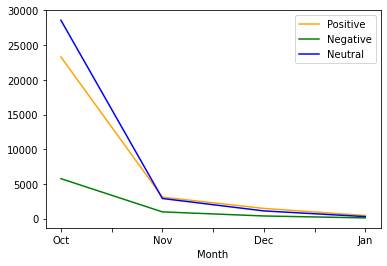

In [ ]:
ax=plt.gca()
data.plot(x="Month",y="Positive",ax=ax,color='orange')
data.plot(x="Month",y="Negative",ax=ax,color='green')
data.plot(x="Month",y="Neutral",ax=ax,color='blue')

In [ ]:
anti3['Sentiment'].value_counts()

Neutral     33014
Positive    27737
Negative     7580
Name: Sentiment, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

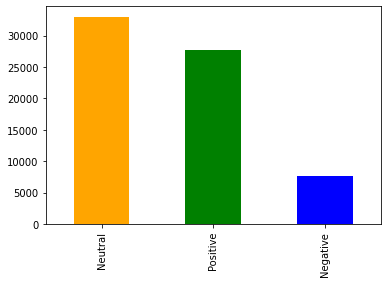

In [ ]:
anti3['Sentiment'].value_counts().plot(kind="bar",color=['orange','green','blue'])
plt.legend

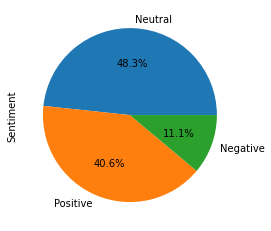

In [ ]:
a=(anti3['Sentiment'].value_counts())/len(anti3)
a.plot(kind="pie",autopct='%1.1f%%')

From the charts above, the sentiment with the highest number of comments is 'Neutral'. It represents 48.3% of the total comment extracted while the 'Negative' comment is the lowest of all which is 11.1%.

In [ ]:
Pos=[]
Neg=[]
Neu=[]
Pos=anti3.loc[anti3['Sentiment']=='Positive']
Neg=anti3.loc[anti3['Sentiment']=='Negative']
Neu=anti3.loc[anti3['Sentiment']=='Neutral']

In [ ]:
Pos.drop(columns='Sentiment',inplace=True)
Neg.drop(columns='Sentiment',inplace=True)
Neu.drop(columns='Sentiment',inplace=True)

In [ ]:
Pos=Pos.to_string()
Neg=Neg.to_string()
Neu=Neu.to_string()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)# instantiate a word cloud object
pos_com = WordCloud(
    background_color='white',
    max_words=100000,
    stopwords=stopwords
)# generate the word cloud
pos_com.generate(Pos)

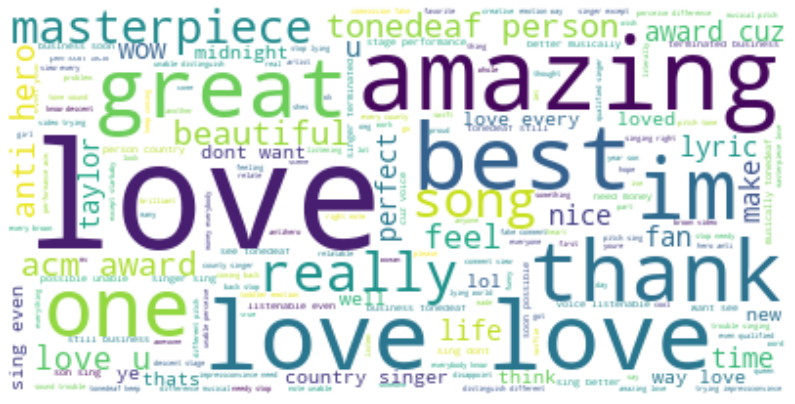

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(pos_com, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
stopwords = set(STOPWORDS)# instantiate a word cloud object
neg_com = WordCloud(
    background_color='white',
    max_words=100000,
    stopwords=stopwords
)# generate the word cloud
neg_com.generate(str(Neg))

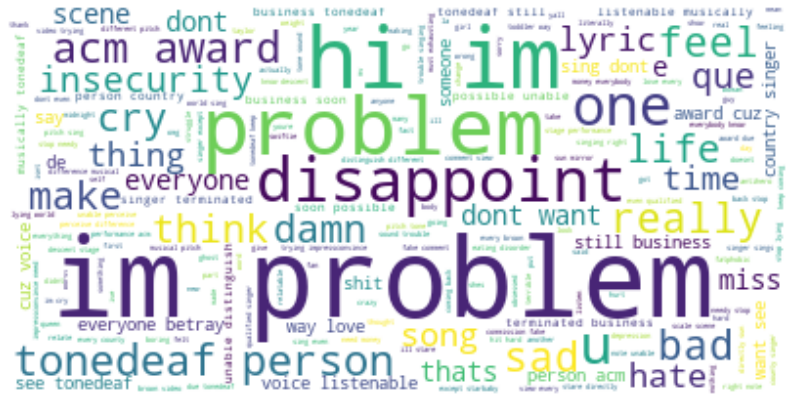

In [ ]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(neg_com, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
stopwords = set(STOPWORDS)# instantiate a word cloud object
neu_com = WordCloud(
    background_color='white',
    max_words=100000,
    stopwords=stopwords
)# generate the word cloud
neu_com.generate(str(Neu))

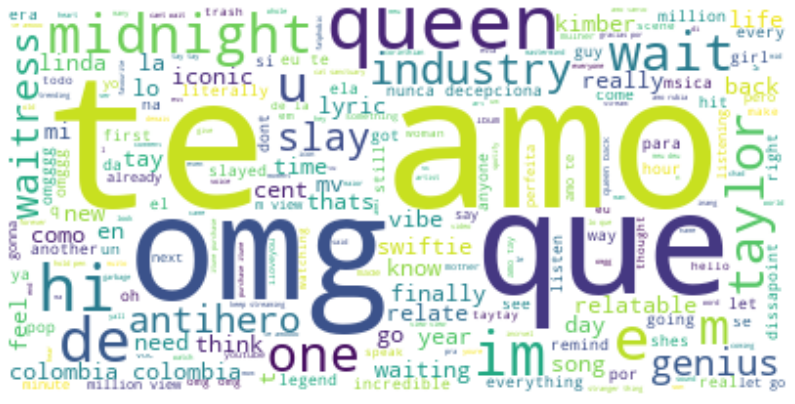

In [ ]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(neu_com, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ENCODING

In [ ]:
#Drop unnecessary columns
anti3.drop(["date","month"], axis=1, inplace=True)

In [ ]:
anti3['Sentiment'].value_counts()

Neutral     33014
Positive    27737
Negative     7580
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
#create instance of label encoder
lab = LabelEncoder()
anti3['Sentiment'] = lab.fit_transform(anti3['Sentiment'])

In [ ]:
anti3['Sentiment'].value_counts()

1    33014
2    27737
0     7580
Name: Sentiment, dtype: int64

# IMBALANCE

In [ ]:
from sklearn.utils import resample
df_neutral = anti3[(anti3['Sentiment']==1)]
df_positive = anti3[(anti3['Sentiment']==2)]
df_negative = anti3[(anti3['Sentiment']==0)]

# upsample minority classes
df_positive_upsampled = resample(df_positive,
                                 replace=True,
                                 n_samples= 33014,
                                 random_state=42)

df_negative_upsampled = resample(df_negative,
                                 replace=True,
                                 n_samples= 33014,
                                 random_state=42)


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral,df_positive_upsampled])

In [ ]:
final_data['Sentiment'].value_counts()

0    33014
1    33014
2    33014
Name: Sentiment, dtype: int64

In [ ]:
comment = []
for sentence in final_data['clean_comment']:
    comment.append(sentence)

# MODELLING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(comment).toarray()
y = final_data["Sentiment"].values

In [ ]:
feature_list = cv.get_feature_names()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.svm import LinearSVC
SVC = LinearSVC()
SVC.fit(X_train, y_train)

LinearSVC()

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train,y_train)

MultinomialNB()

## Prediction

In [ ]:
First10 = final_data.sample(frac = 1, random_state=789)
First10 = First10[0:10]
First10

,clean_comment,Sentiment
68160,holy shit,0
10661,fan since,2
35368,taylor kid terrible hope dont actually end li...,0
8369,clip look beatifull,1
48654,,1
50014,first heard name antihero mayhem think midnigh...,0
180,watched lost found katz lost depiction several...,0
54663,everything hit miss,0
67568,yass,1
20941,im problem yes indeed thats keep avoiding ppl ...,0


In [ ]:
Sentences = []
for sentence in First10['clean_comment']:
    Sentences.append(sentence)
vect= CountVectorizer(ngram_range=(1,3), binary =True, stop_words = 'english', vocabulary = feature_list)
xx = vect.transform(Sentences).toarray()

In [ ]:
First10["Logistic Regression"] =LR.predict(xx)
First10["Linear SVC"] = SVC.predict(xx)
First10["GaussianNB"] = GNB.predict(xx)
First10["MultinomialNB"] = MNB.predict(xx)
First10

,clean_comment,Sentiment,Logistic Regression,Linear SVC,GaussianNB,MultinomialNB
68160,holy shit,0,0,0,0,0
10661,fan since,2,2,2,2,2
35368,taylor kid terrible hope dont actually end li...,0,0,0,0,0
8369,clip look beatifull,1,1,1,1,2
48654,,1,1,1,1,1
50014,first heard name antihero mayhem think midnigh...,0,0,0,0,0
180,watched lost found katz lost depiction several...,0,0,0,0,0
54663,everything hit miss,0,0,0,2,0
67568,yass,1,1,1,1,1
20941,im problem yes indeed thats keep avoiding ppl ...,0,0,0,2,0


**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

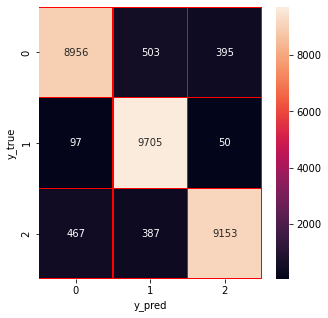

In [ ]:
LR_y_pred = LR.predict(X_test)
LR_cm = confusion_matrix(y_test, LR_y_pred)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(LR_cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

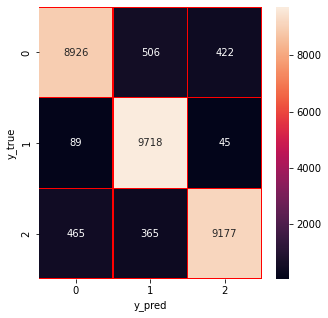

In [ ]:
SVC_y_pred = SVC.predict(X_test)
SVC_cm = confusion_matrix(y_test, SVC_y_pred)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(SVC_cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

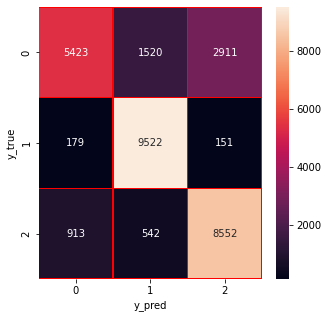

In [ ]:
GNB_y_pred = GNB.predict(X_test)
GNB_cm = confusion_matrix(y_test, GNB_y_pred)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(GNB_cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

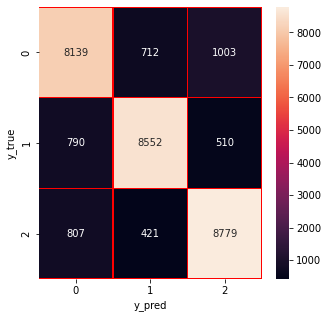

In [ ]:
MNB_y_pred = MNB.predict(X_test)
MNB_cm = confusion_matrix(y_test, MNB_y_pred)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(MNB_cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Logistic Regression")
print(classification_report(y_test, LR_y_pred))
print("\nLinear SVC")
print(classification_report(y_test, SVC_y_pred))
print("\nGaussianNB")
print(classification_report(y_test, GNB_y_pred))
print("\nMultinomialNB")
print(classification_report(y_test, MNB_y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      9854
           1       0.92      0.99      0.95      9852
           2       0.95      0.91      0.93     10007

    accuracy                           0.94     29713
   macro avg       0.94      0.94      0.94     29713
weighted avg       0.94      0.94      0.94     29713


Linear SVC
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      9854
           1       0.92      0.99      0.95      9852
           2       0.95      0.92      0.93     10007

    accuracy                           0.94     29713
   macro avg       0.94      0.94      0.94     29713
weighted avg       0.94      0.94      0.94     29713


GaussianNB
              precision    recall  f1-score   support

           0       0.83      0.55      0.66      9854
           1       0.82      0.97      0.89      9852
           2       0.74      0.

In [ ]:
from sklearn.metrics import mean_squared_error
rms_LR = mean_squared_error(y_test, LR_y_pred, squared=False)
rms_SVC = mean_squared_error(y_test, SVC_y_pred, squared=False)
rms_GNB = mean_squared_error(y_test, GNB_y_pred, squared=False)
rms_MNB = mean_squared_error(y_test, MNB_y_pred, squared=False)


In [ ]:
rms_LR

0.38851516216503135

In [ ]:
rms_SVC

0.39144934767455836

In [ ]:
rms_GNB

0.7715536201233675

In [ ]:
rms_MNB

0.5705679101092562

**PREDICT NEW SENTENCES**

In [ ]:
new_txt=pd.DataFrame({"text": ["love the song!!!", "bad song...", "10/1/2023 viewed"]})
new_txt["text"] = new_txt["text"].apply(lambda text: remove_punctuation(text))
new_txt["text"] = new_txt["text"].apply(lambda text: remove_stopwords(text))
new_txt["text"] = new_txt["text"].apply(lambda text: remove_freqwords(text))
new_txt["text"] = new_txt["text"].apply(lambda text: lemma_words(text))
new_txt['text']= new_txt['text'].apply(lambda x:re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
new_txt

,text
0,love
1,bad
2,viewed


In [ ]:
text = []
for sentence in new_txt['text']:
    text.append(sentence)
vect= CountVectorizer(ngram_range=(1,3), binary =True, stop_words = 'english', vocabulary = feature_list)
xx = vect.transform(text).toarray()

In [ ]:
test = pd.DataFrame({"Model":["GaussianNB", "MultinomialNB", "Logistic Regression", "Linear SVC"],
          "Actual": ["[2, 0, 1]", "[2, 0, 1]", "[2, 0, 1]", "[2, 0, 1]"],
          "Prediction": [GNB.predict(xx), MNB.predict(xx), LR.predict(xx), SVC.predict(xx)]})
test

,Model,Actual,Prediction
0,GaussianNB,"[2, 0, 1]","[2, 2, 1]"
1,MultinomialNB,"[2, 0, 1]","[2, 0, 1]"
2,Logistic Regression,"[2, 0, 1]","[2, 0, 1]"
3,Linear SVC,"[2, 0, 1]","[2, 0, 1]"
